# Data Visualization Project

## Visualizing the best soccer team in the world.

### Team: Visualizing the champions
- Manisha Chandran (manchand)
- Suraj Punjabi (spunjab)
- Vinayaka Gadag (vgadag)

In [110]:
# load csv data
import pandas as pd
import numpy as np
og_data = pd.read_excel('champions-league-data.xlsx', engine='openpyxl')

In [111]:
# original dataframe
og_df = pd.DataFrame(og_data)

In [115]:
og_df.head()

,Season,Winner,Winner Country,Winner Score,scorer 1,scorer 2,scorer 3,scorer 4,scorer 5,scorer 6,...,opponent scorer 2,opponent scorer 3,Finalist,Finalist Country,Venue,Attendance,Winner S,Winner ST,Finalist S,Finalist ST
0,1955–56,Real Madrid,Spain,4,Di Stefano,Rial,Marquitos,Rial,NaN,NaN,...,Templin,Hidalgo,Stade de Reims,France,"France Parc des Princes, Paris",0,10,6,8,5
1,1956–57,Real Madrid,Spain,2,Di Stefano,Gento,NaN,NaN,NaN,NaN,...,NaN,NaN,Fiorentina,Italy,"Spain Santiago Bernabéu Stadium, Madrid",124000,8,6,4,3
2,1957–58,Real Madrid,Spain,3,Di Stefano,Rial,Gento,NaN,NaN,NaN,...,Grillo,NaN,Milan,Italy,"Belgium Heysel Stadium, Brussels",67000,15,8,17,7
3,1958–59,Real Madrid,Spain,2,Mateos,Di Stefano,NaN,NaN,NaN,NaN,...,NaN,NaN,Stade de Reims,France,"West Germany Neckarstadion, Stuttgart",72000,6,4,5,4
4,1959–60,Real Madrid,Spain,7,Di Stefano,Di Stefano,Puskas,Puskas,Puskas,Puskas,...,Stein,Stein,Eintracht Frankfurt,West Germany,"Scotland Hampden Park, Glasgow",127621,20,12,10,7


#### We want to see total number of wins by a club and dropping the unwanted columns to make it easier for analysis.

In [113]:
# Drop unwanted columns for analysis
req_df = og_data.drop(columns=['scorer 1', 'scorer 2', 'scorer 3', 'scorer 4', 'scorer 5', 'scorer 6', 'scorer 7', 'opponent scorer 1', 'opponent scorer 2', 'opponent scorer 3'])
req_df.head()

,Season,Winner,Winner Country,Winner Score,Finalist Score,Finalist,Finalist Country,Venue,Attendance,Winner S,Winner ST,Finalist S,Finalist ST
0,1955–56,Real Madrid,Spain,4,3,Stade de Reims,France,"France Parc des Princes, Paris",0,10,6,8,5
1,1956–57,Real Madrid,Spain,2,0,Fiorentina,Italy,"Spain Santiago Bernabéu Stadium, Madrid",124000,8,6,4,3
2,1957–58,Real Madrid,Spain,3,2,Milan,Italy,"Belgium Heysel Stadium, Brussels",67000,15,8,17,7
3,1958–59,Real Madrid,Spain,2,0,Stade de Reims,France,"West Germany Neckarstadion, Stuttgart",72000,6,4,5,4
4,1959–60,Real Madrid,Spain,7,3,Eintracht Frankfurt,West Germany,"Scotland Hampden Park, Glasgow",127621,20,12,10,7


#### Getting the total win count by value_counts() this gives a series dataframe with the relevant information for further analysis and visualization. By getting the total wins we can ....

In [5]:
# get the total number of wins by club
s = req_df['Winner'].value_counts()

In [6]:
winx = {}
for i, j in s.items():
  winx[i] = j

In [7]:
windf = pd.DataFrame(winx.items(), columns=['Team', 'Wins']) 

In [8]:
windf.head()

,Team,Wins
0,Real Madrid,13
1,Milan,7
2,Liverpool,6
3,Bayern Munich,6
4,Barcelona,5


#### Write something here for finalists

In [9]:
# Number of lossess by club
f = req_df['Finalist'].value_counts()

In [10]:
finx = {}
for i, j in f.items():
  finx[i] = j

In [11]:
findf = pd.DataFrame(finx.items(), columns=['Finalist_Team', 'Losses']) 

In [12]:
findf.head()

,Finalist_Team,Losses
0,Juventus,7
1,Bayern Munich,5
2,Benfica,5
3,Milan,4
4,Liverpool,3


In [116]:
# We want to visualize the number of wins by a club
import plotly.express as px
fig = px.bar(windf, x="Team", y="Wins", title="No of wins by team")
fig.show()

#### The above plot shows the number of wins against the teams. We can see that the club 'Real Madrid' have most number wins 13 and Hamburg and few other teams have just the one win. By visualizing the plot we can intepret that the 'Real Madrid' have dominated the league over the years. This can be visually verified by looking at the second most wins by a team 'Milan' being only 7 which is just above half wins of 'Real madrid'.

In [14]:
# We want to visualize the win % by a club in entire competition
import plotly.express as px

fig = px.pie(windf, values=windf['Wins'], names=windf['Team'], title='Win percentage per club')
fig.show()

#### To support the previous visualization method. If you look the win percentage shared between the clubs 'Real Madrid' again stands out with hisghest win percent of almost 20% and 'Milan' beign the second most with almost 11%.

In [15]:
# How the wins are scattered around the number of matches
import plotly.express as px
df = windf
fig = px.scatter(x=windf['Team'], y=windf['Wins'], color=windf['Team'])
fig.show()

#### This is another way of representing the number of wins using different visualization method(Scatter).

In [117]:
wins_by_country = req_df.groupby('Winner Country').size().sort_values(ascending=False).reset_index(name='Total Wins')
wins_by_country.head()

,Winner Country,Total Wins
0,Spain,18
1,England,12
2,Italy,12
3,Netherlands,6
4,Portugal,4


#### We have seen which clubs have won most titles. Now, let's see the number of wins by country.

In [118]:
import plotly.express as px
fig = px.line(wins_by_country, x="Winner Country", y="Total Wins", title='Total wins by country')
fig.show()
# when we hover over the graph we can see the country that won and total number of times it won

#### By looking at the visulaizaiton we can see that the most number of wins by spain are higher comparing to other countries and 'Real Madrid' and 'Barcelona'have contibuted the most number of wins.

In [155]:
f = req_df['Finalist'].value_counts()

In [156]:
finx = {}
for i, j in f.items():
  finx[i] = j

In [157]:
findf = pd.DataFrame(finx.items(), columns=['Finalist_Team', 'Losses']) 

In [159]:
import plotly.express as px
fig = px.scatter(x=findf['Finalist_Team'], y=findf['Losses'], color=findf['Finalist_Team'])
fig.show()

#### The above visualization method shows the number of times the club has lost in the finals. Juventus have lost total of 7 times.

#### Exploring the data, total number of final appearences by each club.

In [119]:
finalist_count = winx.copy()
for key, value in finx.items():
  if key in finalist_count.keys():
    finalist_count[key] = value + finalist_count[key]
  else:
    finalist_count[key] = value

In [120]:
finalist_count_df = pd.DataFrame(finalist_count.items(), columns=['Team', 'finals'])

In [121]:
finalist_count_df.head()

,Team,finals
0,Real Madrid,16
1,Milan,11
2,Liverpool,9
3,Bayern Munich,11
4,Barcelona,8


In [21]:
import plotly.express as px

fig = px.histogram(finalist_count_df, x="finals", color="Team")
fig.show()

#### We have seen the number of wins by a club. Now, let's see how many times the clubs have reached the finals. From the above visualization methodn we can see that there are 21 teams that have made it  the finals once and and 11 teams have made it to the finals 2-3 times and "Real Madrid" being the only team reaching the finals 16 times and winning 13 of them.

In [22]:
finalist_count_df['Wins'] = windf['Wins']

In [23]:
# Replace NaN values.
finalist_count_df['Wins'] = finalist_count_df['Wins'].fillna(0)
finalist_count_df['Wins'] = finalist_count_df['Wins'].astype(int)
finalist_count_df.head()

,Team,finals,Wins
0,Real Madrid,16,13
1,Milan,11,7
2,Liverpool,9,6
3,Bayern Munich,11,6
4,Barcelona,8,5


In [24]:
import plotly.express as px

fig = px.bar(finalist_count_df, x=finalist_count_df['finals'], y=finalist_count_df['Wins'],
             color='Team',
             height=400)
fig.show()

##### In the previous visulization we have seen the number of times the teams have made it to the finals , but now we also compare them with the wins achieved in the finals by the teams.

In [25]:
y = []
years = req_df['Season']
for year in years:
  y.append(year[:4])

In [26]:
n = req_df.columns[0]
new_df = req_df.copy()
req_df.drop(n, axis=1, inplace=True)

In [27]:
req_df['Year'] = y

In [28]:
req_df.head()

,Winner,Winner Country,Winner Score,Finalist Score,Finalist,Finalist Country,Venue,Attendance,Winner S,Winner ST,Finalist S,Finalist ST,Year
0,Real Madrid,Spain,4,3,Stade de Reims,France,"France Parc des Princes, Paris",0,10,6,8,5,1955
1,Real Madrid,Spain,2,0,Fiorentina,Italy,"Spain Santiago Bernabéu Stadium, Madrid",124000,8,6,4,3,1956
2,Real Madrid,Spain,3,2,Milan,Italy,"Belgium Heysel Stadium, Brussels",67000,15,8,17,7,1957
3,Real Madrid,Spain,2,0,Stade de Reims,France,"West Germany Neckarstadion, Stuttgart",72000,6,4,5,4,1958
4,Real Madrid,Spain,7,3,Eintracht Frankfurt,West Germany,"Scotland Hampden Park, Glasgow",127621,20,12,10,7,1959


In [29]:
req_stadium = req_df[['Year', 'Attendance']]
req_stadium.head()

,Year,Attendance
0,1955,0
1,1956,124000
2,1957,67000
3,1958,72000
4,1959,127621


In [30]:
winner_score_df = req_df[['Winner', 'Winner Score']]

In [31]:
win_score_group = winner_score_df.groupby(by=['Winner'], as_index=False)['Winner Score'].sum()

In [32]:
winner = win_score_group['Winner']
values = win_score_group['Winner Score']

windict = {}
for i in range(len(winner)):
  windict[winner[i]] = values[i]

In [33]:
finalist_score_df = req_df[['Finalist', 'Finalist Score']]

In [34]:
finalist_score_group = finalist_score_df.groupby(by=['Finalist'], as_index=False)['Finalist Score'].sum()

In [35]:
finalist = finalist_score_group['Finalist']
finalist_ = finalist_score_group['Finalist Score']

finalist_scores = {}
for i in range(len(finalist)):
  finalist_scores[finalist[i]] = finalist_[i]

In [36]:
# Total goals scored in the leaugue by a club
# windict
# finalist_scores
club_total_goals = {}
for k, v in finalist_scores.items():
  if k in windict.keys():
    club_total_goals[k] = v + windict[k]
  else:
    club_total_goals[k] = v

In [37]:
total_goals_by_clubs = pd.DataFrame(club_total_goals.items(), columns=['Team', 'Goals'])
total_goals_by_clubs.head()

,Team,Goals
0,Ajax,8
1,Arsenal,1
2,Atlético Madrid,2
3,Barcelona,13
4,Bayer Leverkusen,1


In [38]:
req_df["Match Goals"] = req_df["Winner Score"] + req_df["Finalist Score"]

In [39]:
# Goal difference by match
req_df['Goal Difference'] = req_df['Winner Score'] - req_df['Finalist Score']
req_df.head()

,Winner,Winner Country,Winner Score,Finalist Score,Finalist,Finalist Country,Venue,Attendance,Winner S,Winner ST,Finalist S,Finalist ST,Year,Match Goals,Goal Difference
0,Real Madrid,Spain,4,3,Stade de Reims,France,"France Parc des Princes, Paris",0,10,6,8,5,1955,7,1
1,Real Madrid,Spain,2,0,Fiorentina,Italy,"Spain Santiago Bernabéu Stadium, Madrid",124000,8,6,4,3,1956,2,2
2,Real Madrid,Spain,3,2,Milan,Italy,"Belgium Heysel Stadium, Brussels",67000,15,8,17,7,1957,5,1
3,Real Madrid,Spain,2,0,Stade de Reims,France,"West Germany Neckarstadion, Stuttgart",72000,6,4,5,4,1958,2,2
4,Real Madrid,Spain,7,3,Eintracht Frankfurt,West Germany,"Scotland Hampden Park, Glasgow",127621,20,12,10,7,1959,10,4


In [40]:
# What was the goal margin?.
goal_diff_df = req_df[['Winner', 'Goal Difference']]
goal_diff_df

,Winner,Goal Difference
0,Real Madrid,1
1,Real Madrid,2
2,Real Madrid,1
3,Real Madrid,2
4,Real Madrid,4
...,...,...
61,Real Madrid,3
62,Real Madrid,2
63,Liverpool,2
64,Bayern Munich,1


In [41]:
import plotly.express as px

fig = px.bar(goal_diff_df, x='Winner', y='Goal Difference')
fig.show()

#### The above visualization method shows the total number of winning goals scored by each clubs and the goal differences they won each time. By this we see that 'Real Madrid' have socred the most number of goals and segmentations shows the goal differences of each win.

#### Exploring the data - Now let's analyze and visulaize the data based on attendance to see the popularity of the each finals

In [122]:
import pandas as pd

championsleaguefinal_url = 'https://www.stadiumguide.com/figures-and-statistics/lists/champions-league-final-venues/'
dfs = pd.read_html(championsleaguefinal_url)
championsleaguefinalstadium_df = dfs[0]

In [123]:
championsleaguefinalstadium_df=championsleaguefinalstadium_df.sort_values(by=['Year'])
championsleaguefinalstadium_df=championsleaguefinalstadium_df.reset_index(drop=True)

In [124]:
import pandas as pd

stadium_url = 'https://www.stadiumguide.com/figures-and-statistics/lists/europes-largest-football-stadiums/'
dfs = pd.read_html(stadium_url)
df_stadium= dfs[0]

In [125]:
df_stadiumcapacity=championsleaguefinalstadium_df.merge(df_stadium, on='Stadium', how='left')

In [126]:
df_stadiumcapacity.drop(columns=['Unnamed: 0', 'Match','City','Country'], inplace=True)

In [127]:
df_stadiumcapacity=df_stadiumcapacity.drop(df_stadiumcapacity.tail(6).index)

In [128]:
df_final = pd.concat([og_df, df_stadiumcapacity], axis=1, sort=False)

In [129]:
df_final.drop(columns=['Season', 'Venue'], inplace=True)

In [130]:
df_final['Capacity']= df_final['Capacity'].fillna(df_final['Attendance'])

In [131]:
df_final['Capacity']=df_final['Capacity'].astype(int)

In [132]:
df_final.drop(df_final.tail(3).index,inplace=True) 

In [133]:
df_final['Year']=df_final['Year'].astype(int)

In [134]:
df_final.drop(df_final.head(1).index,inplace=True)

In [135]:
df_s = df_final
df_final['Exceeded Attendance Capacity'] = df_s["Attendance"] - df_s["Capacity"]

In [136]:
df_final = df_final[["Winner","Year","Exceeded Attendance Capacity"]]

In [137]:
df_final["Team with year"] = df_final["Winner"] + " : " + df_final["Year"].map(str)

/var/folders/k6/qggkk1vs47g07dfz49ck6t600000gn/T/ipykernel_19878/748945557.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [138]:
df_final.drop(['Winner', 'Year'], axis=1, inplace = True)
df_final

/Users/vinayakgadag/py-env/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Exceeded Attendance Capacity,Team with year
1,42956,Real Madrid : 1957
2,0,Real Madrid : 1958
3,0,Real Madrid : 1959
4,75621,Real Madrid : 1960
5,0,Benfica : 1961
...,...,...
58,-3424,Real Madrid : 2014
59,0,Barcelona : 2015
60,-8076,Real Madrid : 2016
61,-8658,Real Madrid : 2017


In [59]:
import plotly.express as px
fig = px.bar(df_final, x='Team with year', y='Exceeded Attendance Capacity')
fig.show()

#### The above bar graph viz method shows the number of fans attended the matches and the stadium capacity.
#### Not only the wins determine best club but the popularity of the clubs as well. We can visually see using bar graph that more fans have attended the 'Real Madird' final matches. In 1960 more number of fans have attended the 'Real Madrid' match and total of ~76K above the capacity of the stadium.

In [139]:
finalist_count = winx.copy()
for key, value in finx.items():
  if key in finalist_count.keys():
    finalist_count[key] = value + finalist_count[key]
  else:
    finalist_count[key] = value

In [140]:
finalist_count_df = pd.DataFrame(finalist_count.items(), columns=['Team', 'finals'])

In [141]:
finalist_count_df['Wins'] = windf['Wins']

In [142]:
# Replace NaN values.
finalist_count_df['Wins'] = finalist_count_df['Wins'].fillna(0)
finalist_count_df['Wins'] = finalist_count_df['Wins'].astype(int)
finalist_count_df

,Team,finals,Wins
0,Real Madrid,16,13
1,Milan,11,7
2,Liverpool,9,6
3,Bayern Munich,11,6
4,Barcelona,8,5
5,Ajax,6,4
6,Manchester United,5,3
7,Internazionale,5,3
8,Benfica,7,2
9,Juventus,9,2


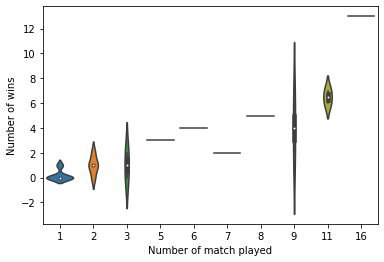

In [65]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.violinplot(x = 'finals', y = 'Wins', data = finalist_count_df)
plt.xlabel("Number of match played")
plt.ylabel("Number of wins");

#### This was one of the failed experiment. We wanted to see the number of finals appeared and wins by each club but we couldn't interpret the results we wanted to.

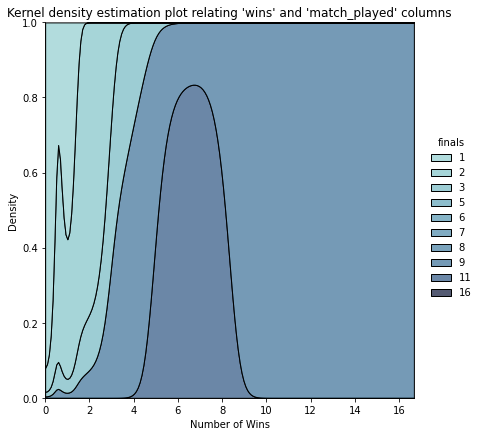

In [66]:
#Kernel density estimation plot relating 'wins' and 'match_played' columns
sns.displot(
    data=finalist_count_df,
    x="Wins", hue="finals",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
    warn_singular=False,
)
plt.title("Kernel density estimation plot relating 'wins' and 'match_played' columns")
plt.xlabel("Number of Wins");

#### This was one of the failed experiment. We wanted to see the number of finals appeared and wins by each club but we couldn't interpret the results we wanted to.

#### So far we seen the number of wins, goals, and final appearances by each club. But the success of a team is dependent on how the performance of it's players. We will explore the total number of goals by players.

In [143]:
# Highest goal scorer in the competetion, Clean the data by filling the NaN values
top_player = og_df.copy()
top_player.fillna(0)

,Season,Winner,Winner Country,Winner Score,scorer 1,scorer 2,scorer 3,scorer 4,scorer 5,scorer 6,...,opponent scorer 2,opponent scorer 3,Finalist,Finalist Country,Venue,Attendance,Winner S,Winner ST,Finalist S,Finalist ST
0,1955–56,Real Madrid,Spain,4,Di Stefano,Rial,Marquitos,Rial,0,0,...,Templin,Hidalgo,Stade de Reims,France,"France Parc des Princes, Paris",0,10,6,8,5
1,1956–57,Real Madrid,Spain,2,Di Stefano,Gento,0,0,0,0,...,0,0,Fiorentina,Italy,"Spain Santiago Bernabéu Stadium, Madrid",124000,8,6,4,3
2,1957–58,Real Madrid,Spain,3,Di Stefano,Rial,Gento,0,0,0,...,Grillo,0,Milan,Italy,"Belgium Heysel Stadium, Brussels",67000,15,8,17,7
3,1958–59,Real Madrid,Spain,2,Mateos,Di Stefano,0,0,0,0,...,0,0,Stade de Reims,France,"West Germany Neckarstadion, Stuttgart",72000,6,4,5,4
4,1959–60,Real Madrid,Spain,7,Di Stefano,Di Stefano,Puskas,Puskas,Puskas,Puskas,...,Stein,Stein,Eintracht Frankfurt,West Germany,"Scotland Hampden Park, Glasgow",127621,20,12,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2016–17,Real Madrid,Spain,4,Ronaldo,Casemiro,Ronaldo,Asensio,0,0,...,0,0,Juventus,Italy,"Wales Millennium Stadium, Cardiff",65842,18,5,11,4
62,2017-18,Real Madrid,Spain,3,Karim Benzema,Gareth Bale,Gareth Bale,0,0,0,...,0,0,Liverpool,England,"NSC Olimpiyskiy Stadium, Kyiv",61561,12,5,12,2
63,2018-19,Liverpool,England,2,Mohamad Salah,Divock Origi,0,0,0,0,...,0,0,Totenham Hotspur,England,"Metropolitano Stadium, Madrid",63272,14,3,16,8
64,2019-20,Bayern Munich,Germany,1,Kingsley Koman,0,0,0,0,0,...,0,0,PSG,Paris,"Estádio da Luz, Lisbon",0,12,2,9,3


In [144]:
top_goal_win1_scorer = top_player['scorer 1'].value_counts()
top_goal_win2_scorer = top_player['scorer 2'].value_counts()
top_goal_win3_scorer = top_player['scorer 3'].value_counts()
top_goal_win4_scorer = top_player['scorer 4'].value_counts()
top_goal_win5_scorer = top_player['scorer 5'].value_counts()
top_goal_win6_scorer = top_player['scorer 6'].value_counts()
top_goal_win7_scorer = top_player['scorer 7'].value_counts()

In [145]:
import itertools 
import collections

# top_goal_win1_scorer.items(), top_goal_win2_scorer.items(), top_goal_win3_scorer.items(), top_goal_win4_scorer.items(), top_goal_win5_scorer.items(), top_goal_win6_scorer.items(), top_goal_win7_scorer.items()
def merge_dict(dict1, dict2):
    temp_dict = collections.defaultdict(int)
    for k, v in itertools.chain(dict1.items(), dict2.items()):
        temp_dict[k] += v
    return temp_dict

In [146]:
total_win_goals_by_player1 = merge_dict(top_goal_win1_scorer, top_goal_win2_scorer)
total_win_goals_by_player2 = merge_dict(total_win_goals_by_player1, top_goal_win3_scorer)
total_win_goals_by_player3 = merge_dict(total_win_goals_by_player2, top_goal_win4_scorer)
total_win_goals_by_player4 = merge_dict(total_win_goals_by_player3, top_goal_win5_scorer)
total_win_goals_by_player5 = merge_dict(total_win_goals_by_player4, top_goal_win6_scorer)
total_win_goals_by_player_final = merge_dict(total_win_goals_by_player5, top_goal_win7_scorer)
final_winning_goals_by_player = dict(total_win_goals_by_player_final)

In [147]:
# Opponents scores1
top_goal_los1_scorer = top_player['opponent scorer 1'].value_counts()
top_goal_los2_scorer = top_player['opponent scorer 2'].value_counts()
top_goal_los3_scorer = top_player['opponent scorer 3'].value_counts()

In [148]:
opp_goal_scorers1 = merge_dict(top_goal_los1_scorer, top_goal_los2_scorer)
final_opp_goals = merge_dict(opp_goal_scorers1, top_goal_los3_scorer)
final_opp_goals_by_player = dict(final_opp_goals)
total_goals_scored_by_player_overal = merge_dict(final_winning_goals_by_player, final_opp_goals_by_player)
total_goals_scored_by_player_overal = dict(total_goals_scored_by_player_overal)
total_goals_player_df = pd.DataFrame(total_goals_scored_by_player_overal.items(), columns=['Player', 'Goals'])

In [149]:
total_goals_player_df

,Player,Goals
0,Di Stefano,7
1,Ramos,2
2,Eto'o,2
3,Roth,2
4,Ronaldo,4
...,...,...
122,Templin,1
123,Crespo,2
124,Stein,2
125,Czibor,1


In [150]:
players = ""
#print(total_goals_scored_by_player_overal)
for k, v in total_goals_scored_by_player_overal.items():
    players = players + (k + " ") * v
    #print(k)
print(players)

Di Stefano Di Stefano Di Stefano Di Stefano Di Stefano Di Stefano Di Stefano Ramos Ramos Eto'o Eto'o Roth Roth Ronaldo Ronaldo Ronaldo Ronaldo Aguas Aguas Dalglish Amancio Francis Carlos Alberto Platini Rijkaard Kai Havertz Milito Milito Inzaghi Inzaghi Israel Koeman Raul Raul Mateos Pedro van Dijk Withe Gerard Sheringham Drogba Kluivert Riedle Riedle Karim Benzema Kennedy McDermott Kingsley Koman Robertson Boli Mandzukic Mandzukic Prati Prati Prati Rep Gullit Gullit Mohamad Salah Jair Ravanelli Charlton Charlton Neal Neal Hoeness Hoeness Gemmell Gemmell Madjer Massero Massero Magath Altafini Altafini Cruyff Cruyff Effenberg Morientes Mazzola Mazzola Mazzola Mijatovic Rakiric Muller Muller Muller Muller Messi Messi Rial Rial Rial Kindvall Divock Origi Zidane Smicer Ramallets (o.g.) McManaman Best Gento Gento Juary Robben Chalmers Suarez Haan Gareth Bale Gareth Bale Casemiro Cavem Solskjaer Belleti Smith Deco Milani Serena Bale van Basten van Basten Coluna Coluna Villa Puskas Puskas Pus

In [151]:
comment_words = ''

for val in players:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

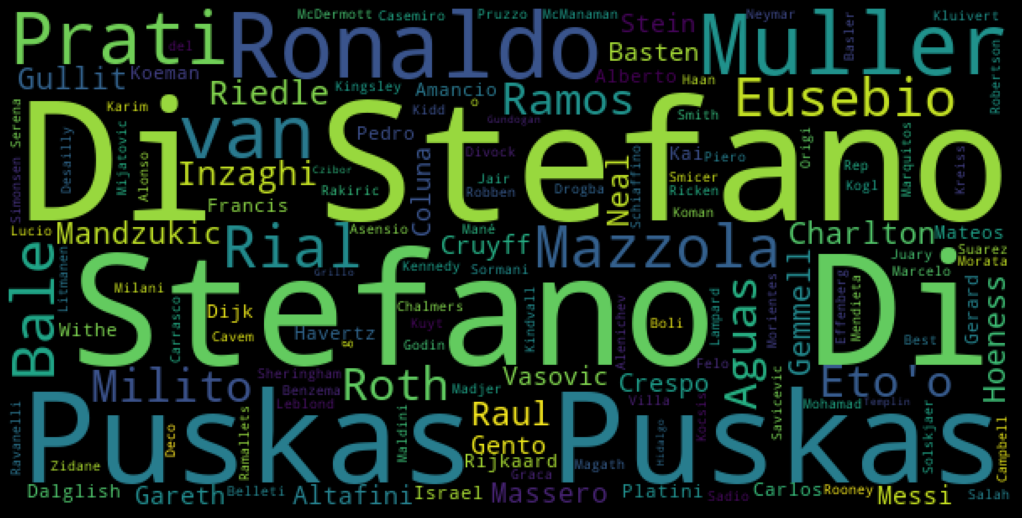

In [152]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color='black', width=600, height=300, max_font_size=150, 
                      max_words=200).generate(players)
wordcloud.recolor(random_state=0)
plt.figure(figsize = (14, 10),facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### The above figure represnets the word cloud of the players , the bigger the font of the player  name   the more mentions they have as the scorer in the finals of the Europa League. we can see that Stefano and Puskas , as they have the higest number of golas in the finals.

<Figure size 1080x576 with 0 Axes>

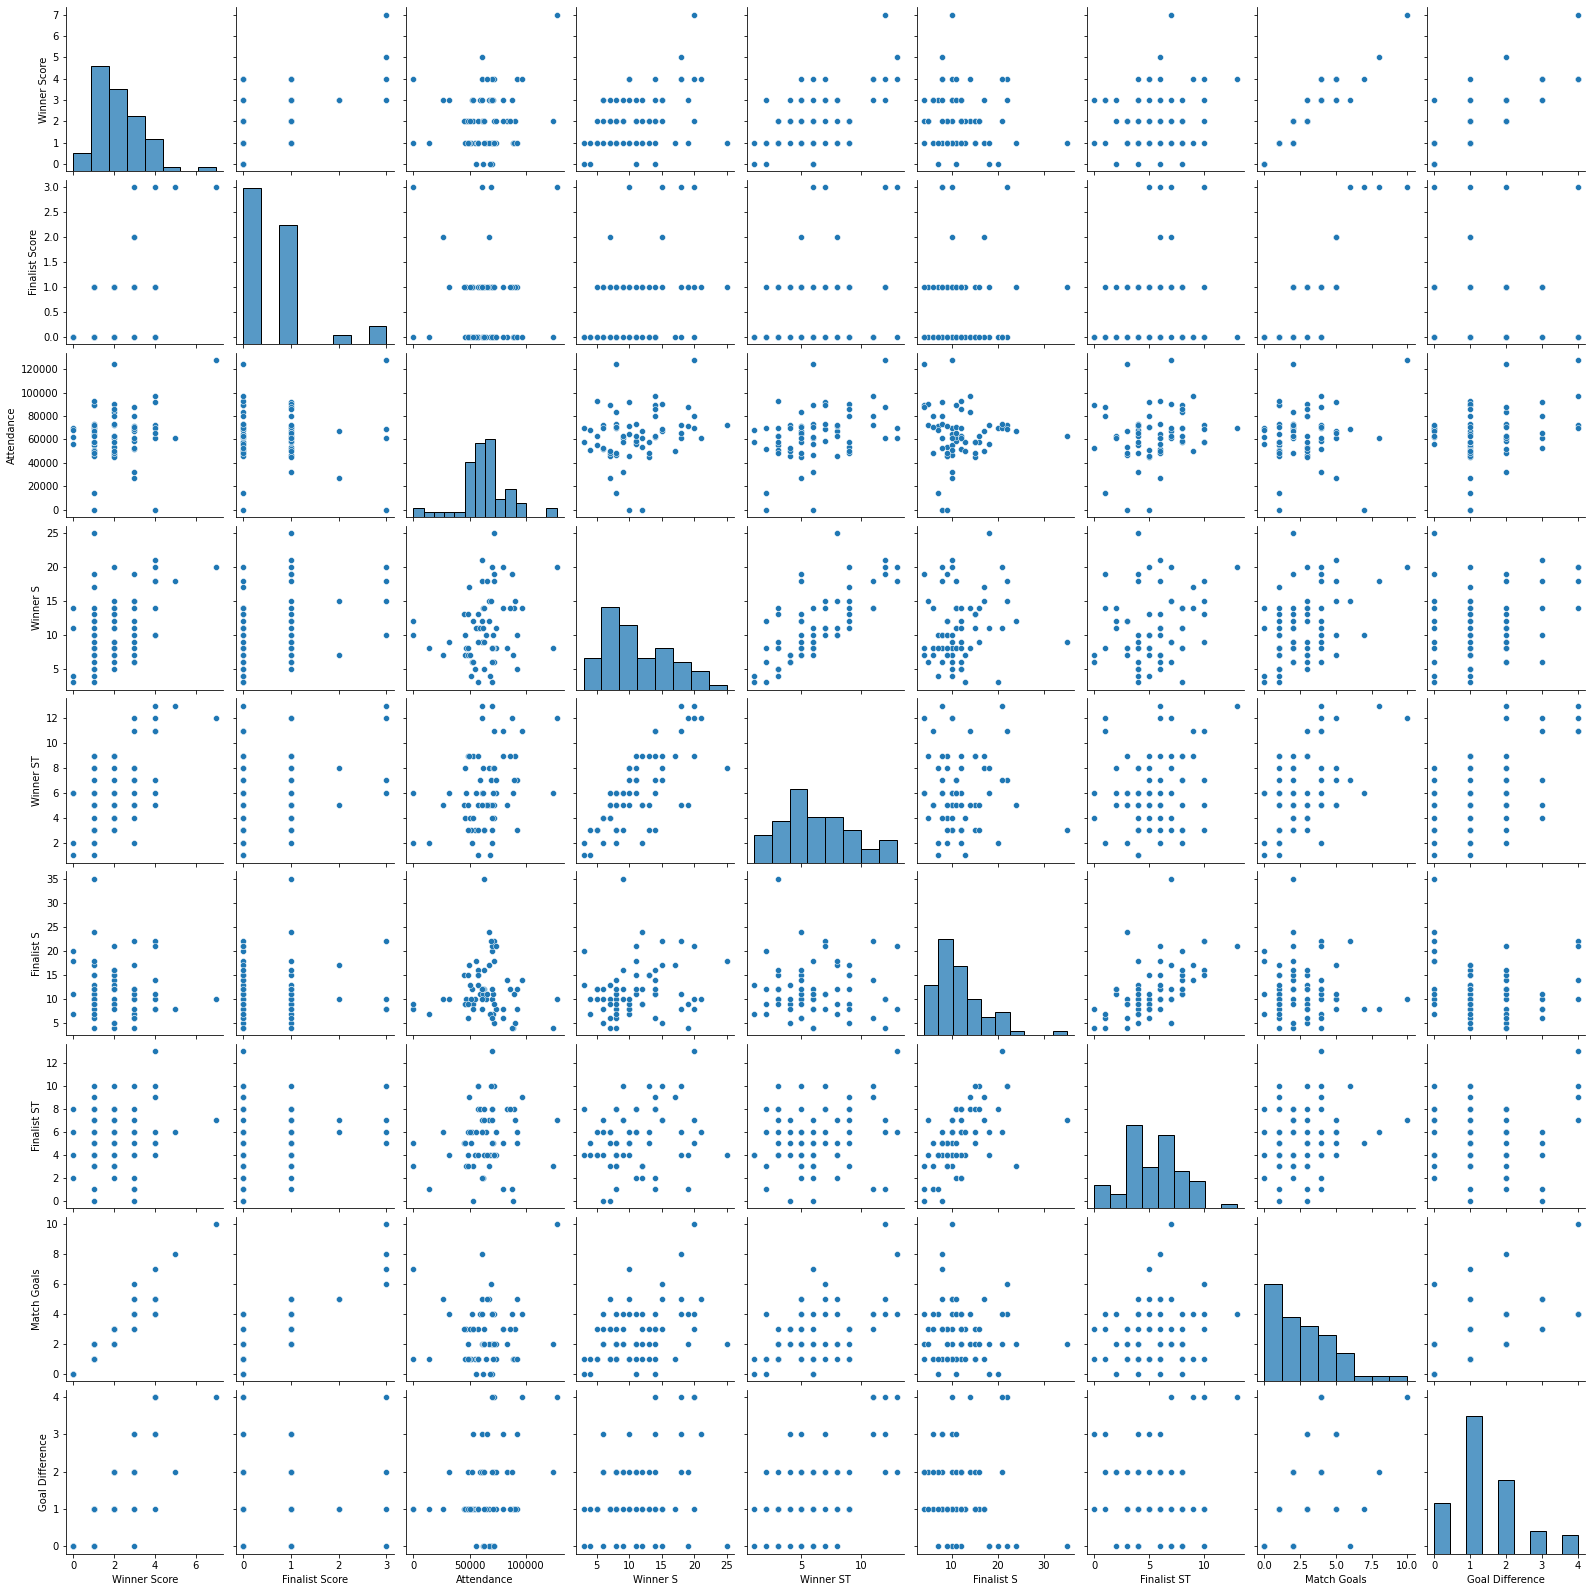

In [77]:
import seaborn as sns
plt.figure(figsize=(15,8))

sns.pairplot(req_df)

#### We also check the distribution of all the varaibles with each other usuing the seaborn library's pair pair plots .As the data is such we dont find any particular distribtion in the data that can be observed and stated . All the plots showe random distributions of the varaibles with each other.

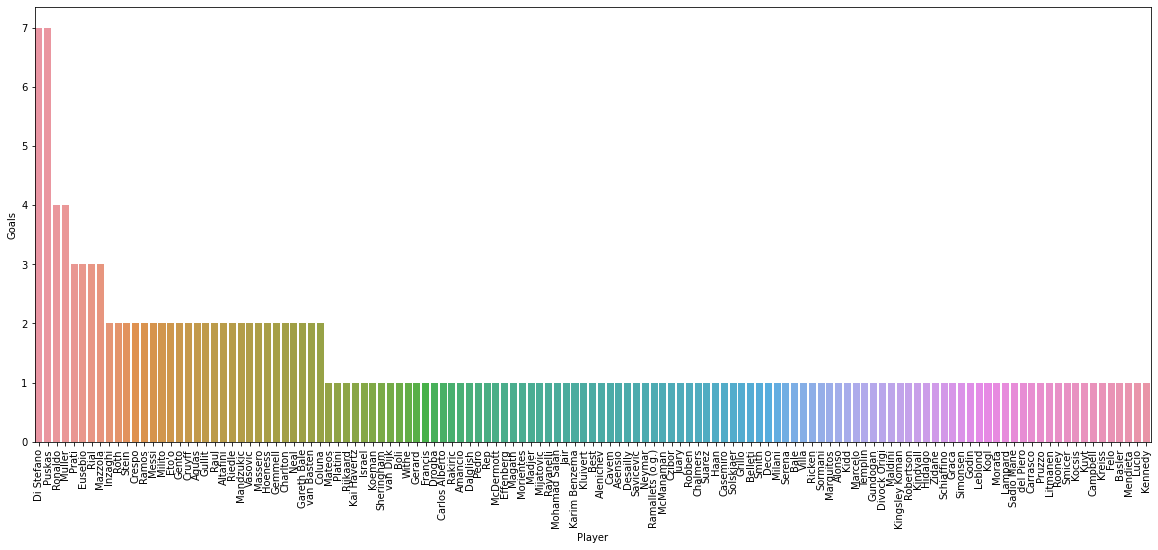

In [154]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))
total_goals_player_df = total_goals_player_df.sort_values(by=['Goals'], ascending=False)
ax = sns.barplot(x="Player", y="Goals", data=total_goals_player_df)
ax.tick_params(axis='x', rotation=90)

#### The plot above histogram shows the players and the number of goals scored by them, Di stefano , Puskas and Ronaldo being the top three high scorers in Finals of Europa

In [82]:
req_df.head()

,Winner,Winner Country,Winner Score,Finalist Score,Finalist,Finalist Country,Venue,Attendance,Winner S,Winner ST,Finalist S,Finalist ST,Year,Match Goals,Goal Difference
0,Real Madrid,Spain,4,3,Stade de Reims,France,"France Parc des Princes, Paris",0,10,6,8,5,1955,7,1
1,Real Madrid,Spain,2,0,Fiorentina,Italy,"Spain Santiago Bernabéu Stadium, Madrid",124000,8,6,4,3,1956,2,2
2,Real Madrid,Spain,3,2,Milan,Italy,"Belgium Heysel Stadium, Brussels",67000,15,8,17,7,1957,5,1
3,Real Madrid,Spain,2,0,Stade de Reims,France,"West Germany Neckarstadion, Stuttgart",72000,6,4,5,4,1958,2,2
4,Real Madrid,Spain,7,3,Eintracht Frankfurt,West Germany,"Scotland Hampden Park, Glasgow",127621,20,12,10,7,1959,10,4


In [83]:
accu = req_df.groupby(['Winner']).sum().reset_index()

In [104]:
accu['Win_Accuracy'] = (accu['Winner ST'] / accu['Winner S']) * 100
accu['Fin_Accuracy'] = (accu['Finalist ST'] / accu['Finalist S']) * 100

In [106]:
accu.head(10)

,Winner,Winner Score,Finalist Score,Attendance,Winner S,Winner ST,Finalist S,Finalist ST,Match Goals,Goal Difference,Win_Accuracy,Fin_Accuracy
0,Ajax,6,0,283747,48,27,54,32,6,6,56.250000,59.259259
1,Aston Villa,1,0,46000,10,8,9,5,1,1,80.000000,55.555556
2,Barcelona,11,3,371041,66,40,41,18,14,8,60.606061,43.902439
3,Bayern Munich,11,2,333083,81,39,77,35,13,9,48.148148,45.454545
4,Benfica,8,5,87989,25,18,18,12,13,3,72.000000,66.666667
5,Borussia Dortmund,3,1,59000,11,7,11,8,4,2,63.636364,72.727273
6,Celtic,2,1,45000,13,5,15,5,3,1,38.461538,33.333333
7,Chelsea,2,1,76610,17,5,42,8,3,1,29.411765,19.047619
8,Feyenoord,2,1,53187,12,9,9,3,3,1,75.000000,33.333333
9,Hamburg,1,0,73500,8,6,8,4,1,1,75.000000,50.000000


In [86]:
accu['Winner'].tolist()

['Ajax',
 'Aston Villa',
 'Barcelona',
 'Bayern Munich',
 'Benfica',
 'Borussia Dortmund',
 'Celtic',
 'Chelsea',
 'Feyenoord',
 'Hamburg',
 'Internazionale',
 'Juventus',
 'Liverpool',
 'Manchester United',
 'Marseille',
 'Milan',
 'Nottingham Forest',
 'PSV Eindhoven',
 'Porto',
 'Real Madrid',
 'Red Star Belgrade',
 'Steaua București']

In [99]:
sorted_df = accu.sort_values(by=['Win_Accuracy'], ascending=True)
sorted_df_ten = sorted_df.head(10)

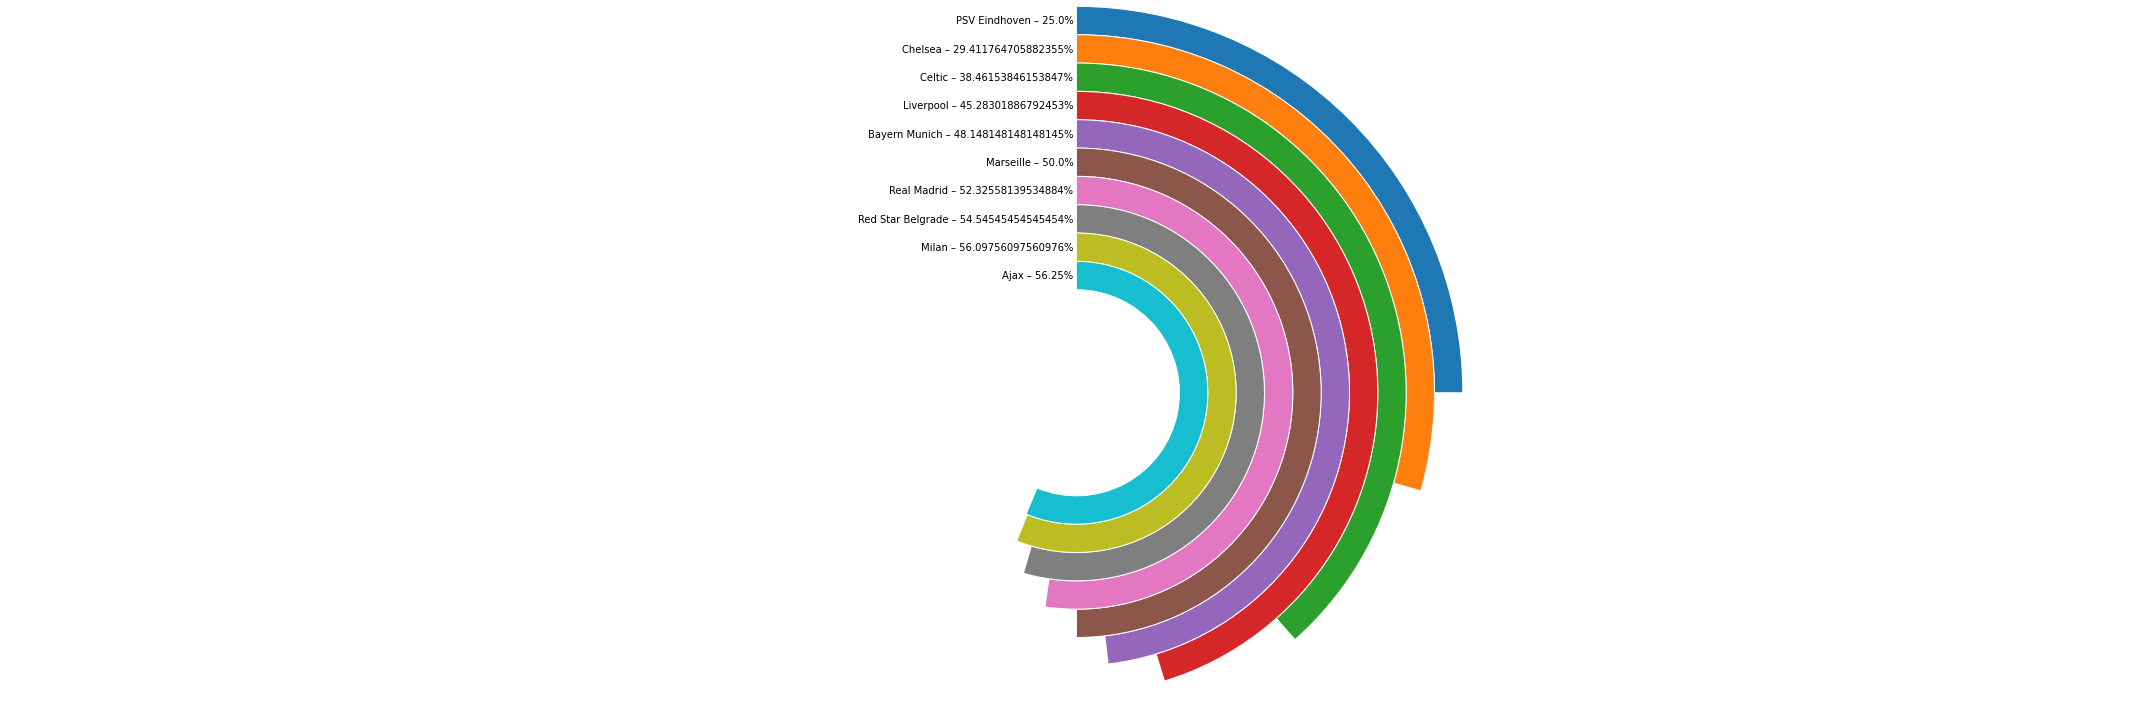

In [101]:

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)

cathegories = sorted_df_ten['Winner'].tolist()
percent = sorted_df_ten['Win_Accuracy'].tolist()
n = len(percent)
percent_circle = max(percent) / 100
r = 1.5
r_inner = 0.4
w = (r - r_inner) / n
colors = plt.cm.tab10.colors
fig, ax = plt.subplots()
ax.axis("equal")

for i in range(n):
    radius = r - i * w
    ax.pie([percent[i] / max(percent) * percent_circle], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{cathegories[i]} – {percent[i]}%'], labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'},
          normalize=False)
    ax.text(0, radius - w / 2, f'{cathegories[i]} – {percent[i]}% ', ha='right', va='center')
plt.tight_layout()
plt.show()

#### The above circular plot shows the Shot accuaray of the teams in the Finals , Ajax club has the lowest shot accuracy in the europa finals and Red Star belgrade the 2nd least accurate team with lowest shot accuray . we come across these new clubs as the matchs played by these teams is few  in number as compared to the big teams suvh as Madrid and Milan

In [102]:
sorted_df = accu.sort_values(by=['Win_Accuracy'], ascending=False)
sorted_df_ten = sorted_df.head(10)

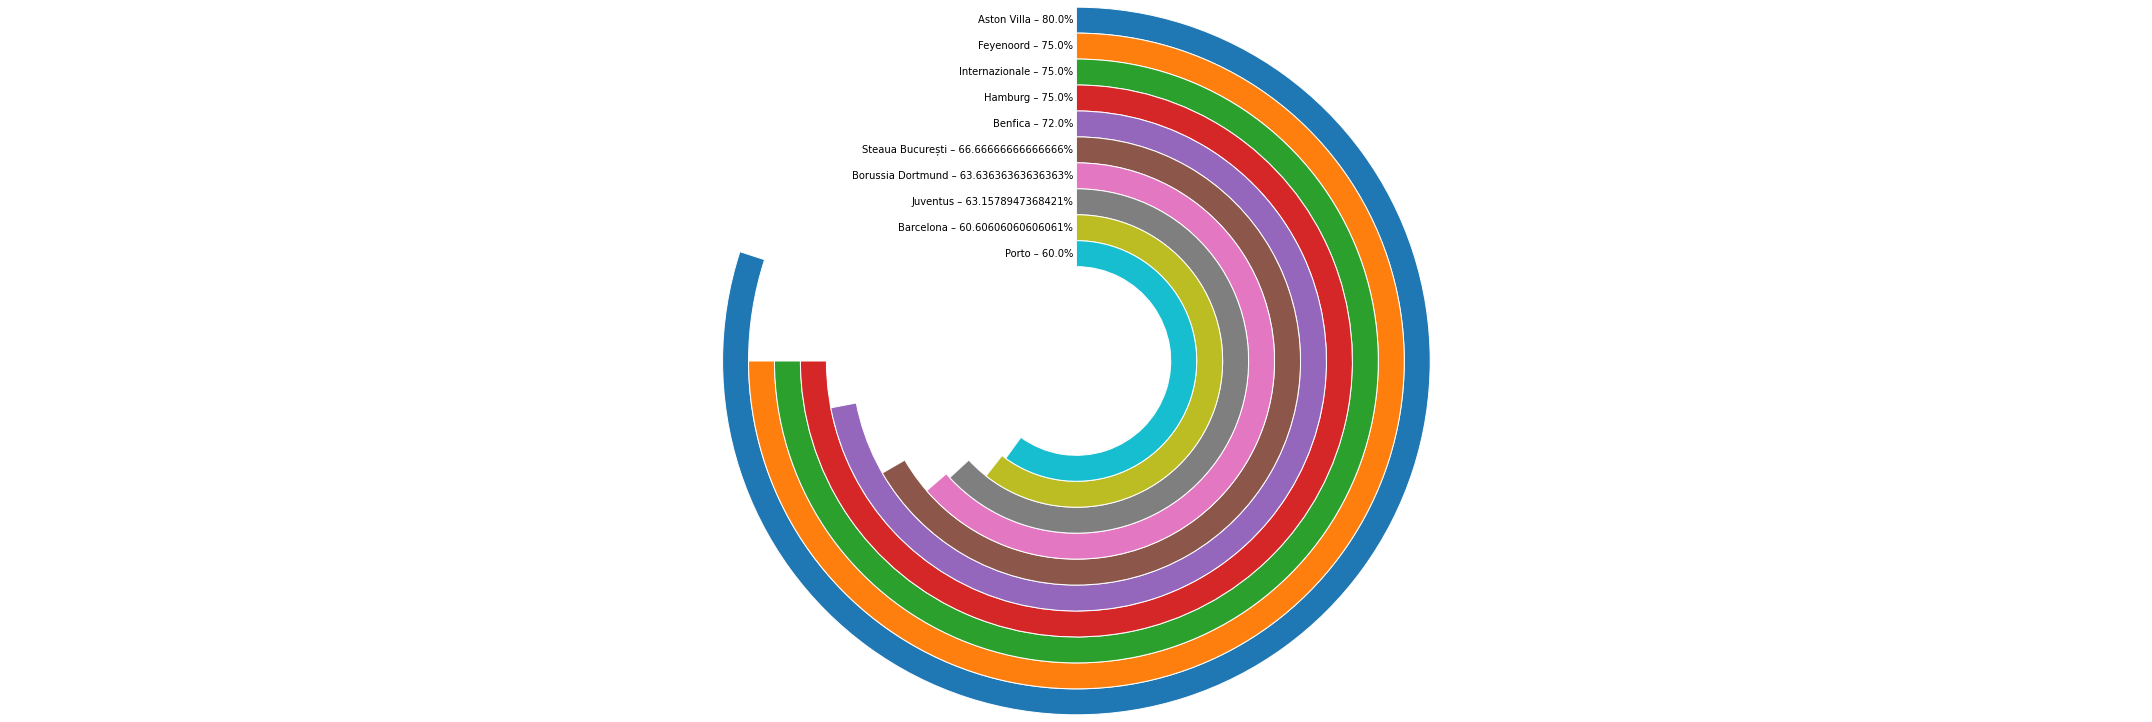

In [103]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)


cathegories = sorted_df_ten['Winner'].tolist()
percent = sorted_df_ten['Win_Accuracy'].tolist()

n = len(percent)
percent_circle = max(percent) / 100

r = 1.5
r_inner = 0.4
w = (r - r_inner) / n

colors = plt.cm.tab10.colors
fig, ax = plt.subplots()
ax.axis("equal")

for i in range(n):
    radius = r - i * w
    ax.pie([percent[i] / max(percent) * percent_circle], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{cathegories[i]} – {percent[i]}%'], labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'},
          normalize=False)
    ax.text(0, radius - w / 2, f'{cathegories[i]} – {percent[i]}% ', ha='right', va='center')

plt.tight_layout()
plt.show()

#### The above circular plot shows the Shot accuaray of the teams in the Finals but from higer order , Aston villa club has the highest shot accuracy in the europa finals and Feyenooerd  the 2nd most accurate team with lowest shot accuray . we come across these new clubs as the matchs played by these teams is few in number as compared to the big teams suvh as Madrid and Milan here as well, we still dont find the two most dominating teams in the highest shot accuaray circle.